EM 538-001: Practical Machine Learning for Enginering Analystics (Spring 2025)  
Instructor: Fred Livingston (fjliving@ncsu.edu) 

### Load and Prepare Datasets

In [125]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [126]:
df_iris = pd.read_csv('iris.csv')
df_iris.head()


,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [127]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

X = df_iris[['SepalLength[cm]', 'SepalWidth[cm]', 'PetalLength[cm]', 'PetalWidth[cm]']]
y = label_encoder.fit_transform(df_iris['Species']) 


In [128]:
X_temp, X_test, y_temp, y_test = \
        train_test_split(X, y, test_size=0.2, 
                         shuffle=True, random_state=123, stratify=y)
X_train, X_valid, y_train, y_valid = \
        train_test_split(X_temp, y_temp, test_size=0.2,
                         shuffle=True, random_state=123, stratify=y_temp)

In [129]:
from sklearn.cluster import KMeans
kmean_model = KMeans(n_clusters=3, random_state=42) 
iris_kmeans = kmean_model.fit(X_train)

In [130]:
y_pred

array([0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1,
       0, 0, 1, 0, 0, 0, 0, 0])

In [131]:
X_test['Prediction'] = y_pred
X_test.head()


,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Prediction
80,5.5,2.4,3.8,1.1,0
45,4.8,3.0,1.4,0.3,2
144,6.7,3.3,5.7,2.5,1
110,6.5,3.2,5.1,2.0,1
38,4.4,3.0,1.3,0.2,2


<Axes: xlabel='PetalLength[cm]', ylabel='PetalWidth[cm]'>

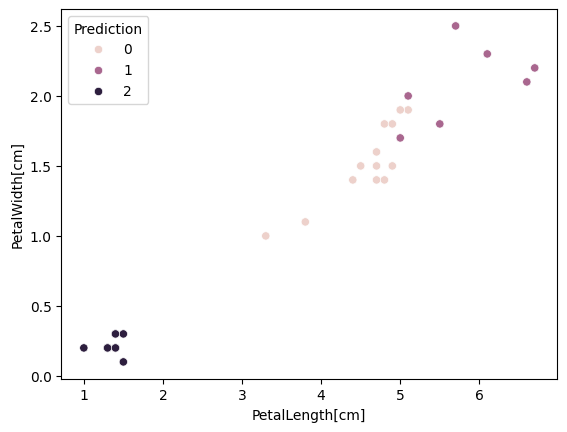

In [132]:
import seaborn as sns
sns.scatterplot(data=X_test, y="PetalWidth[cm]", x="PetalLength[cm]", hue='Prediction')